# Extract

In [ ]:
import os

working_dir = os.getcwd()
test_video_dir = os.path.join(working_dir, 'youtube', 'tennis')

video_fn = 'test.mp4'

video_path = os.path.join(test_video_dir, video_fn)

In [ ]:
video_path

'/content/drive/My Drive/Data_Videos/youtube/tennis/test.mp4'

In [ ]:
video_cap.release()

In [ ]:
import cv2

video_cap = cv2.VideoCapture(video_path)

if video_cap.isOpened():
    n_frames = video_cap.get(cv2.CAP_PROP_FRAME_COUNT)
    f_width = video_cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    f_height = video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    fps = video_cap.get(cv2.CAP_PROP_FPS)
    print(f'video_fn: {video_fn}, number of frames: {n_frames:.0f}, f_width: {f_width:.0f}, f_height: {f_height:.0f}')
    print(f'FPS: {fps}')

video_fn: test.mp4, number of frames: 1257, f_width: 1920, f_height: 1080
FPS: 60.0


In [ ]:
from matplotlib import pyplot as plt

def GET_9_frame_images_from_(cap, fps, frame_num, save_img=False):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 30))
    plt.subplots_adjust(wspace=0.1, hspace=-0.7)
    axes = axes.ravel()
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num-1)
    for i in range(9):
        ret, image = cap.read()
        if ret:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image,(320, 128),interpolation=cv2.INTER_AREA)
            axes[i].imshow(image)
            axes[i].set_title('frame: {:.0f}, t={:.2f}s'.format(cap.get(cv2.CAP_PROP_POS_FRAMES), (frame_num+i)/fps))        
    if save_img:
        plt.savefig('test_tennis')

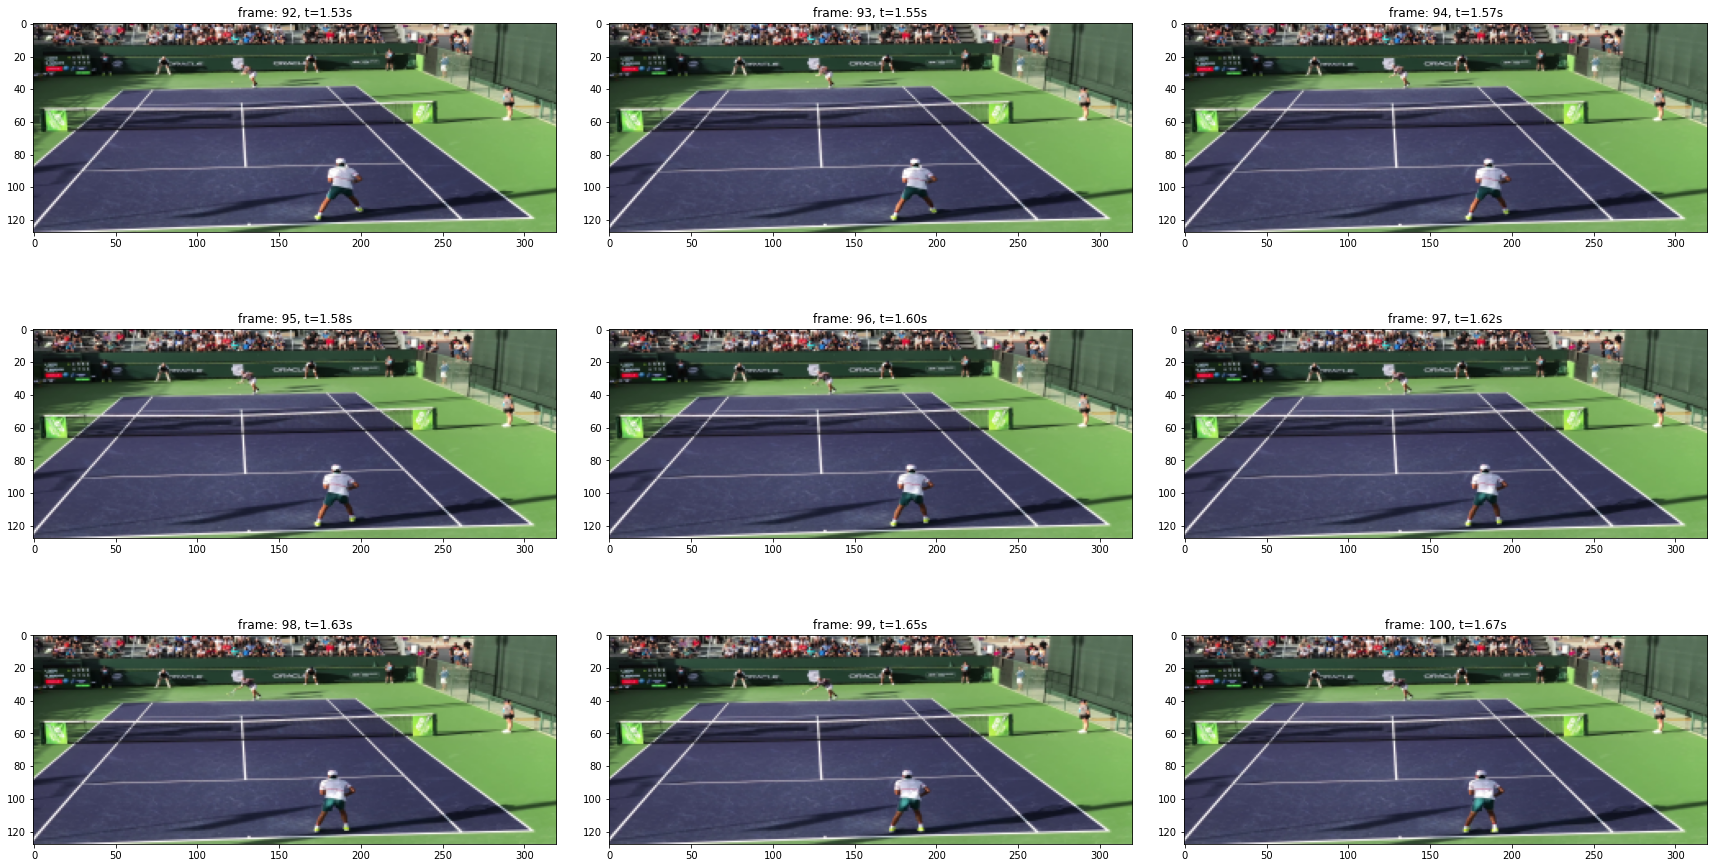

In [ ]:
GET_9_frame_images_from_(video_cap, fps, 92)

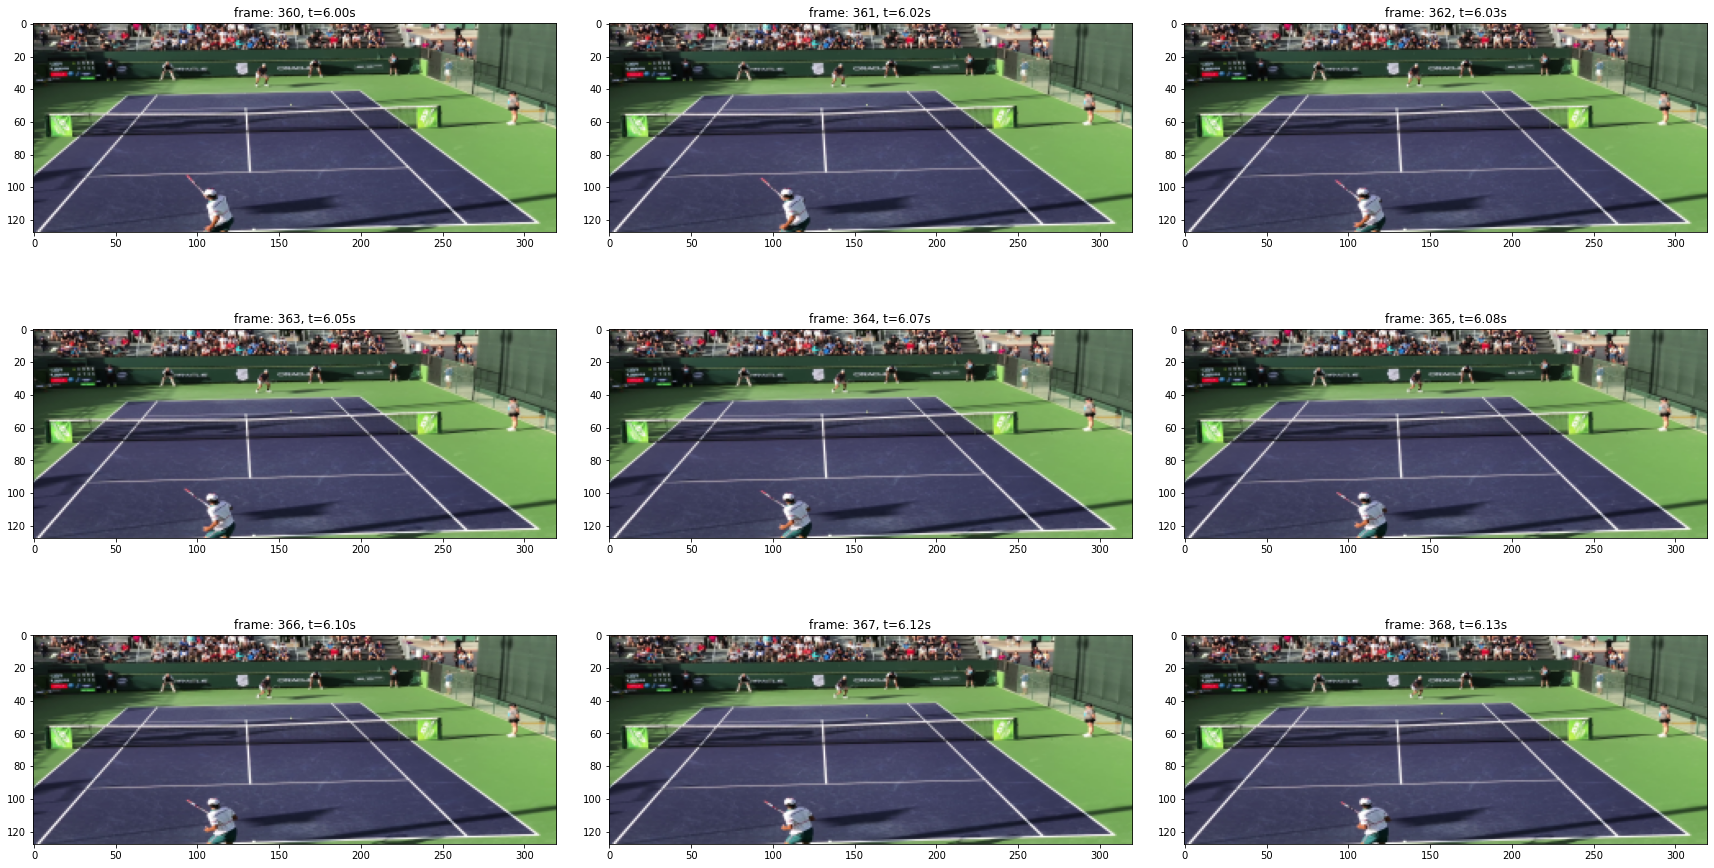

In [ ]:
GET_9_frame_images_from_(video_cap, fps, 360, True)

In [ ]:
from matplotlib import pyplot as plt

def get_image_from_frame_num(cap, fps, frame_num, save_img=False):
    fig = plt.figure(figsize=(12, 8))
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num-1)
    ret, image = cap.read()
    print(image.shape)
    if ret:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image,None,fx=0.2,fy=0.2,interpolation=cv2.INTER_AREA)
        plt.imshow(image)
        plt.title('frame: {:.0f}, t={:.2f}s'.format(cap.get(cv2.CAP_PROP_POS_FRAMES), frame_num/fps))
        if save_img:
            plt.savefig('test_tennis')

(1080, 1920, 3)


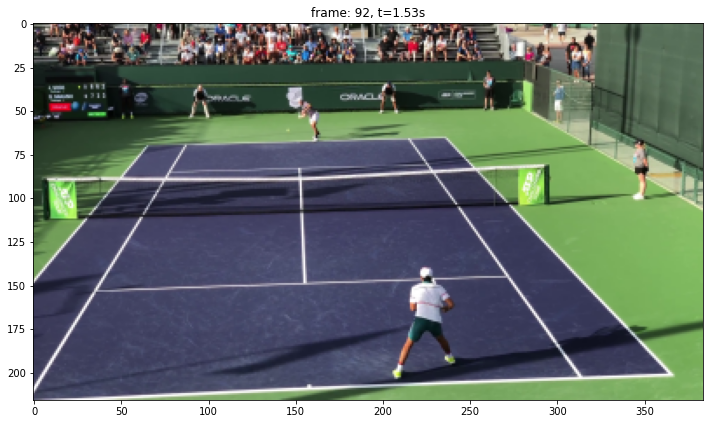

In [ ]:
get_image_from_frame_num(video_cap, fps, 92)

## resized check

ref. http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

In [ ]:
from matplotlib import pyplot as plt

def check_image_quality(cap, fps, frame_num):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 30))
    plt.subplots_adjust(wspace=0.1, hspace=-0.5)
    axes = axes.ravel()
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num-1)
    ret, image = cap.read()
    if ret:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resized_img = cv2.resize(image,(320,128), interpolation=cv2.INTER_LINEAR)
        resized_img_AREA = cv2.resize(image,(320,128),interpolation=cv2.INTER_AREA)
        image = cv2.resize(resized_img,(1920,1080))
        image_CUBIC = cv2.resize(resized_img_AREA,(1920,1080),interpolation=cv2.INTER_CUBIC)
        axes[0].imshow(resized_img)
        axes[0].set_title('resized (defalt: LINEAR) : frame: {:.0f}, t={:.2f}s'.format(cap.get(cv2.CAP_PROP_POS_FRAMES), (frame_num)/fps))
        axes[1].imshow(image)
        axes[1].set_title('original (LINEAR->LINEAR) : frame: {:.0f}, t={:.2f}s'.format(cap.get(cv2.CAP_PROP_POS_FRAMES), (frame_num)/fps))
        axes[2].imshow(resized_img_AREA)
        axes[2].set_title('resized (AREA) : frame: {:.0f}, t={:.2f}s'.format(cap.get(cv2.CAP_PROP_POS_FRAMES), (frame_num)/fps))
        axes[3].imshow(image_CUBIC)
        axes[3].set_title('original (AREA->CUBIC) : frame: {:.0f}, t={:.2f}s'.format(cap.get(cv2.CAP_PROP_POS_FRAMES), (frame_num)/fps))      

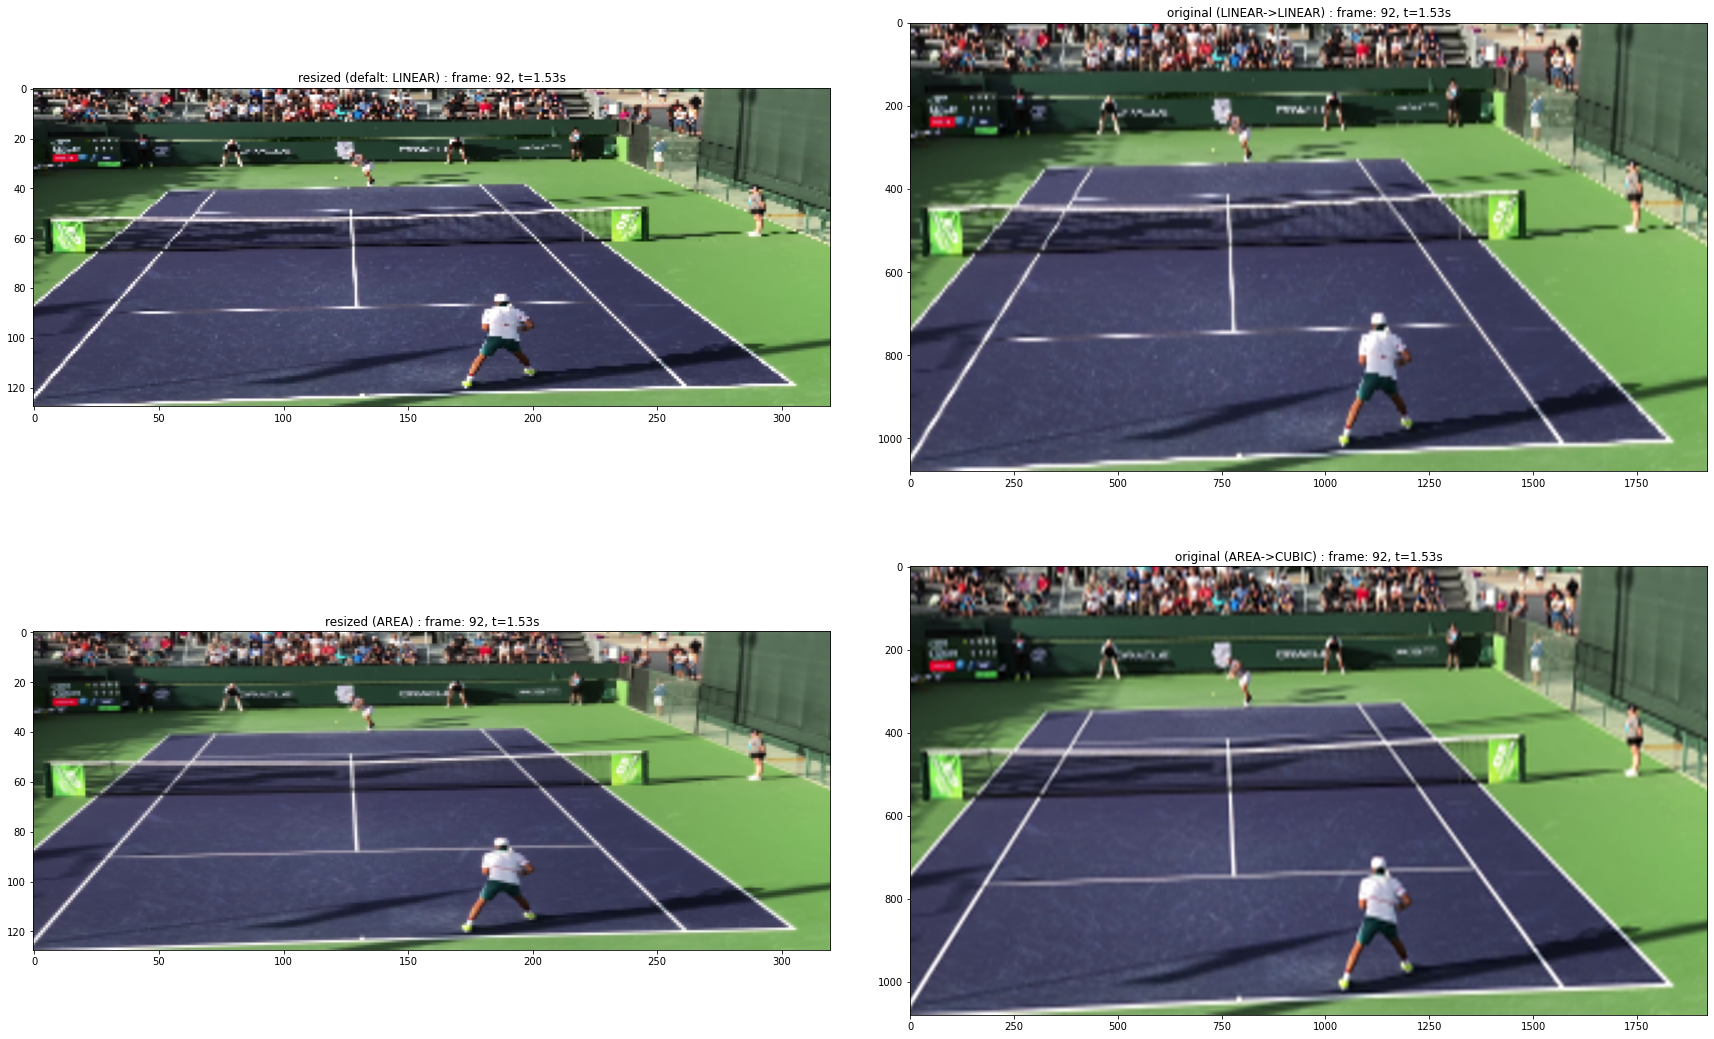

In [ ]:
check_image_quality(video_cap, fps, 92)